In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)
y.shape, X.shape

((768,), (768, 8))

In [9]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X, y)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 1.17252335e-01  3.35998236e-02 -1.40873814e-02 -1.27048489e-03
 -1.24032044e-03  7.72023595e-02  1.41904166e+00  1.00353805e-02]


In [11]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.11725233532587193
Glucose 0.03359982355513219
BloodPressure -0.014087381375314834
SkinThickness -0.0012704848887338878
Insulin -0.0012403204425827387
BMI 0.0772023595410882
DiabetesPedigreeFunction 1.4190416580357113
Age 0.01003538052704967


In [12]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-7.70291206]


In [13]:
y_pred = logistic.predict(X)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


In [14]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)

array([[447,  53],
       [114, 154]], dtype=int64)

<AxesSubplot:>

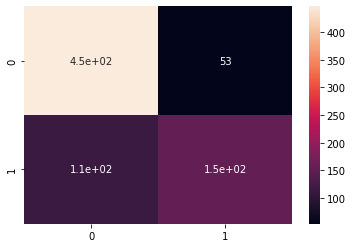

In [15]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [16]:
logistic.score(X, y)

0.7825520833333334

In [18]:
metrics.accuracy_score(y, y_pred)

0.7825520833333334

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
poly = PolynomialFeatures(2)

In [21]:
poly = poly.fit_transform(X)
poly

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]])

In [22]:
polynomial = LogisticRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
print("Coefficients: \n", polynomial.coef_[0])

Coefficients: 
 [-8.30812233e-06 -8.19440204e-06 -5.15353695e-04 -2.62604838e-04
 -8.01723588e-05 -2.74842924e-04 -1.25452277e-04 -1.07295729e-06
 -1.28668592e-04  6.93194358e-05  4.56839612e-04  5.37486317e-04
  1.20103684e-04  5.64352728e-05  1.62799863e-04  8.35807597e-06
  6.88809620e-05  1.66752510e-04 -6.19488313e-06 -7.45612245e-06
 -5.12867633e-05  9.18256911e-05  7.93198740e-05 -6.21287237e-04
 -7.72035530e-04 -1.99387427e-04  7.14791649e-05  2.40670836e-04
  6.34472132e-05  1.24528452e-03  3.96244716e-05  1.98894572e-04
 -6.54716896e-05  3.88293433e-05  1.49919612e-04  3.60053134e-06
 -2.95406408e-04 -1.09801505e-04  1.40390920e-04  1.22203994e-04
  3.22591453e-05  7.03048297e-05  7.25609500e-07  2.47604293e-05
 -4.53484096e-04]


In [30]:
_ = [print(k, v) for k, v in zip(X.columns, polynomial.coef_[0])]

Pregnancies -8.308122334021955e-06
Glucose -8.194402039155719e-06
BloodPressure -0.0005153536950228874
SkinThickness -0.00026260483809398055
Insulin -8.017235879319873e-05
BMI -0.00027484292381955316
DiabetesPedigreeFunction -0.00012545227673394893
Age -1.0729572947866596e-06


In [35]:
y_pred = polynomial.predict(poly)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 0
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


In [36]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)

array([[411,  89],
       [127, 141]], dtype=int64)

<AxesSubplot:>

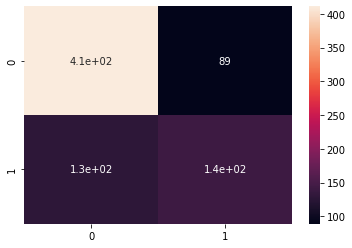

In [37]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [38]:
metrics.accuracy_score(y, y_pred)

0.71875

### 1. Изучите документацию sklearn, посвященную классу LogisticRegression. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

X,y = make_classification (n_samples=1000,
                          n_features=6,
                          n_informative=6,
                          n_redundant=0,
                          n_classes=6,
                          class_sep=2,
                          random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

model_1 = LogisticRegression(C=1.0, solver='liblinear')
model_2 = LogisticRegression(C=0.5, solver='lbfgs') #solver по умолчанию
model_3 = LogisticRegression(C=0.01, solver='lbfgs')

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

accuracy_model_1 = model_1.score(X_test, y_test)
accuracy_model_2 = model_2.score(X_test, y_test)
accuracy_model_3 = model_3.score(X_test, y_test)

print(f"Accuracy model 1: {accuracy_model_1}")
print(f"Accuracy model 2: {accuracy_model_2}")
print(f"Accuracy model 3: {accuracy_model_3}")

Accuracy model 1: 0.7466666666666667
Accuracy model 2: 0.78
Accuracy model 3: 0.76


In [111]:
r2_score(model_2.predict(X_test), y_test)

0.6231316271345229

In [112]:
mean_squared_error(model_2.predict(X_test), y_test)

1.18

### 2.Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности. Рекомендуется исследовать следующие модели:
###### Метод опорных векторов
Без ядра\
С линейным ядром\
С гауссовым ядром\
С полиномиальным ядром
###### Метод ближайших соседей
###### Многослойный перцептрон
###### Дерево решений
###### Наивный байесовский классификатор
###### (*) Другие методы:
Пассивно-агрессивный классификатор\
Гребневый классификатор\
Случайный лес\
Беггинг

In [116]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X,y = make_classification (n_samples=1000,
                          n_features=6,
                          n_informative=6,
                          n_redundant=0,
                          n_classes=6,
                          class_sep=2,
                          random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

# без ядра
svm_ = SVC()
svm_.fit(X_train, y_train)
pred_ = svm_.predict(X_test)
accuracy_ = accuracy_score(y_test, pred_)
conf_matrix = confusion_matrix(y_test, pred_)
print(f"Accuracy SVM without Kernel: {accuracy_}")
print("Confusion Matrix SVM without Kernel:")
print(conf_matrix)

# с линейным ядром
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, pred_linear)
conf_matrix_linear = confusion_matrix(y_test, pred_linear)
print(f"Accuracy SVM with Linear Kernel: {accuracy_linear}")
print("Confusion Matrix SVM with Linear Kernel:")
print(conf_matrix_linear)

# с полиномиальным ядром
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
pred_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, pred_poly)
conf_matrix_poly = confusion_matrix(y_test, pred_poly)
print(f"Accuracy SVM with Polynomial Kernel: {accuracy_poly}")
print("Confusion Matrix SVM with Polynomial Kernel:")
print(conf_matrix_poly)

# с гауссовым ядром
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, pred_rbf)
conf_matrix_rbf = confusion_matrix(y_test, pred_rbf)
print(f"Accuracy SVM with Gaussian Kernel: {accuracy_rbf}")
print("Confusion Matrix SVM with Gaussian Kernel:")
print(conf_matrix_rbf)

# с сигмоидным ядром
svm_sigma = SVC(kernel='sigmoid')
svm_sigma.fit(X_train, y_train)
pred_sigma = svm_sigma.predict(X_test)
accuracy_sigma = accuracy_score(y_test, pred_sigma)
conf_matrix_sigma = confusion_matrix(y_test, pred_sigma)
print(f"Accuracy SVM with Sigmoid Kernel: {accuracy_sigma}")
print("Confusion Matrix SVM with Sigmoid Kernel:")
print(conf_matrix_sigma)

Accuracy SVM without Kernel: 0.94
Confusion Matrix SVM without Kernel:
[[32  1  0  0  1  0]
 [ 0 20  0  0  0  0]
 [ 0  0 24  0  0  1]
 [ 2  0  0 24  0  0]
 [ 0  0  0  0 20  1]
 [ 0  0  2  0  1 21]]
Accuracy SVM with Linear Kernel: 0.8266666666666667
Confusion Matrix SVM with Linear Kernel:
[[31  2  0  0  1  0]
 [ 2 16  0  1  0  1]
 [ 1  0 23  0  0  1]
 [ 3  5  0 18  0  0]
 [ 0  0  0  0 19  2]
 [ 0  1  2  0  4 17]]
Accuracy SVM with Polynomial Kernel: 0.92
Confusion Matrix SVM with Polynomial Kernel:
[[31  2  0  0  1  0]
 [ 0 20  0  0  0  0]
 [ 0  0 24  0  0  1]
 [ 1  3  0 22  0  0]
 [ 0  0  1  0 19  1]
 [ 0  0  2  0  0 22]]
Accuracy SVM with Gaussian Kernel: 0.94
Confusion Matrix SVM with Gaussian Kernel:
[[32  1  0  0  1  0]
 [ 0 20  0  0  0  0]
 [ 0  0 24  0  0  1]
 [ 2  0  0 24  0  0]
 [ 0  0  0  0 20  1]
 [ 0  0  2  0  1 21]]
Accuracy SVM with Sigmoid Kernel: 0.5
Confusion Matrix SVM with Sigmoid Kernel:
[[20  7  1  5  1  0]
 [ 4 12  1  1  1  1]
 [ 5  2 14  0  2  2]
 [10  5  4  7  

#### Метод ближайших соседей

In [117]:
from sklearn.neighbors import KNeighborsClassifier

for n in [1, 2, 5, 8, 10, 15, 25, 40, 55]:
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X_train, y_train)
    pred_neigh = neigh.predict(X_test)
    accuracy = accuracy_score(y_test, pred_neigh)
    conf_matrix = confusion_matrix(y_test, pred_neigh)
    print(n, accuracy)

1 0.94
2 0.9333333333333333
5 0.9466666666666667
8 0.9533333333333334
10 0.9466666666666667
15 0.94
25 0.9466666666666667
40 0.9333333333333333
55 0.92


In [118]:
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(X_train, y_train)
pred_neigh = neigh.predict(X_test)
accuracy = accuracy_score(y_test, pred_neigh)
conf_matrix = confusion_matrix(y_test, pred_neigh)
print(accuracy)
print(conf_matrix)

0.9533333333333334
[[32  1  0  0  1  0]
 [ 0 20  0  0  0  0]
 [ 0  0 24  0  0  1]
 [ 0  1  0 25  0  0]
 [ 0  0  0  0 21  0]
 [ 0  0  2  0  1 21]]


#### Многослойный перцептрон

In [119]:
from sklearn.neural_network import MLPClassifier

for h in [2, 10, 30, 50, 100, 150, 200, 300]:
    mlp = MLPClassifier(hidden_layer_sizes=(h, ), max_iter=300)
    mlp.fit(X_train, y_train)
    pred_mlp = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, pred_mlp)
    conf_matrix = confusion_matrix(y_test, pred_mlp)
    print(accuracy)

0.5333333333333333
0.88
0.9333333333333333
0.9333333333333333
0.94
0.9466666666666667
0.9533333333333334
0.9533333333333334


In [121]:
mlp = MLPClassifier(hidden_layer_sizes=(200, ), max_iter=300)
mlp.fit(X_train, y_train)
pred_mlp = mlp.predict(X_test)
accuracy = accuracy_score(y_test, pred_mlp)
conf_matrix = confusion_matrix(y_test, pred_mlp)
print(accuracy)
print(conf_matrix)

0.9533333333333334
[[32  1  0  0  1  0]
 [ 0 20  0  0  0  0]
 [ 0  0 23  0  0  2]
 [ 0  0  0 26  0  0]
 [ 0  0  0  0 20  1]
 [ 0  0  1  0  1 22]]


#### Дерево решений

In [122]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
accuracy = accuracy_score(y_test, pred_dt)
conf_matrix = confusion_matrix(y_test, pred_dt)
print(accuracy)
print(conf_matrix)

0.8733333333333333
[[31  2  0  0  1  0]
 [ 1 17  0  0  0  2]
 [ 2  1 19  0  1  2]
 [ 1  1  0 24  0  0]
 [ 1  0  0  1 18  1]
 [ 0  1  1  0  0 22]]


#### Наивный байесовский классификатор

In [123]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)
accuracy = accuracy_score(y_test, pred_nb)
conf_matrix = confusion_matrix(y_test, pred_nb)
print(accuracy)
print(conf_matrix)

0.7333333333333333
[[29  3  0  1  1  0]
 [ 5 12  0  1  0  2]
 [ 0  0 23  0  2  0]
 [ 6  1  1 16  2  0]
 [ 0  0  0  0 16  5]
 [ 0  0  2  0  8 14]]


#### (*) Другие методы:
Пассивно-агрессивный классификатор\
Гребневый классификатор\
Случайный лес\
Беггинг

In [124]:
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

# пассивно-агрессивный классификатор
pac = PassiveAggressiveClassifier()
pac.fit(X_train, y_train)
pred_pac = pac.predict(X_test)
accuracy_pac = accuracy_score(y_test, pred_pac)
conf_matrix_pac = confusion_matrix(y_test, pred_pac)
print(f"Accuracy Passive Aggressive Classifier: {accuracy_pac}")
print("Confusion Matrix Passive Aggressive Classifier:")
print(conf_matrix_pac)

# гребневый классификатор
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)
accuracy_ridge = accuracy_score(y_test, pred_ridge)
conf_matrix_ridge = confusion_matrix(y_test, pred_ridge)
print(f"Accuracy Ridge Classifier: {accuracy_ridge}")
print("Confusion Matrix Ridge Classifier:")
print(conf_matrix_ridge)

# случайный лес
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, pred_rf)
conf_matrix_rf = confusion_matrix(y_test, pred_rf)
print(f"Accuracy Random Forest Classifier: {accuracy_rf}")
print("Confusion Matrix Random Forest Classifier:")
print(conf_matrix_rf)

# бэггинг
bagging = BaggingClassifier()
bagging.fit(X_train, y_train)
pred_bagging = bagging.predict(X_test)
accuracy_bagging = accuracy_score(y_test, pred_bagging)
conf_matrix_bagging = confusion_matrix(y_test, pred_bagging)
print(f"Accuracy Bagging Classifier: {accuracy_bagging}")
print("Confusion Matrix Bagging Classifier:")
print(conf_matrix_bagging)

Accuracy Passive Aggressive Classifier: 0.5933333333333334
Confusion Matrix Passive Aggressive Classifier:
[[26  2  1  2  1  2]
 [ 1 13  0  1  1  4]
 [ 7  0 18  0  0  0]
 [ 9  3  0 10  4  0]
 [ 0  0  1  0 20  0]
 [ 3  1  5  0 13  2]]
Accuracy Ridge Classifier: 0.7333333333333333
Confusion Matrix Ridge Classifier:
[[24  2  6  1  1  0]
 [ 4 14  0  0  1  1]
 [ 3  0 20  0  2  0]
 [ 5  3  0 17  1  0]
 [ 0  0  0  0 18  3]
 [ 0  1  2  0  4 17]]
Accuracy Random Forest Classifier: 0.9
Confusion Matrix Random Forest Classifier:
[[32  1  0  0  1  0]
 [ 0 16  0  2  1  1]
 [ 1  0 22  0  0  2]
 [ 1  1  0 24  0  0]
 [ 0  0  0  0 20  1]
 [ 0  0  2  0  1 21]]
Accuracy Bagging Classifier: 0.8666666666666667
Confusion Matrix Bagging Classifier:
[[30  3  0  0  1  0]
 [ 0 16  0  2  0  2]
 [ 0  1 22  0  0  2]
 [ 1  2  0 22  1  0]
 [ 1  0  0  1 18  1]
 [ 0  0  2  0  0 22]]


### 3.Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [125]:
X,y = make_classification (n_samples=1000,
                          n_features=6,
                          n_informative=6,
                          n_redundant=0,
                          n_classes=6,
                          class_sep=2,
                          random_state=0)


def train_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
    
    models = {
        'SVM without Kernel': SVC(),
        'SVM with Linear Kernel': SVC(kernel='linear'),
        'SVM with Gaussian Kernel': SVC(kernel='rbf'),
        'SVM with Polynomial Kernel': SVC(kernel='poly'),
        'KNeighbors Classifier': KNeighborsClassifier(),
        'MLP Classifier': MLPClassifier(),
        'Decision Tree Classifier': DecisionTreeClassifier(),
        'GaussianNB Classifier': GaussianNB(),
        'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
        'Ridge Classifier': RidgeClassifier(),
        'Random Forest Classifier': RandomForestClassifier(),
        'Bagging Classifier': BaggingClassifier()
    }
    
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        results[name] = accuracy
        
    return results

accuracy_results = train_models(X, y)

for model, accuracy in accuracy_results.items():
    print(f"Accuracy {model}: {accuracy}")

Accuracy SVM without Kernel: 0.94
Accuracy SVM with Linear Kernel: 0.8266666666666667
Accuracy SVM with Gaussian Kernel: 0.94
Accuracy SVM with Polynomial Kernel: 0.92
Accuracy KNeighbors Classifier: 0.9466666666666667
Accuracy MLP Classifier: 0.9333333333333333
Accuracy Decision Tree Classifier: 0.8666666666666667
Accuracy GaussianNB Classifier: 0.7333333333333333
Accuracy Passive Aggressive Classifier: 0.6466666666666666
Accuracy Ridge Classifier: 0.7333333333333333
Accuracy Random Forest Classifier: 0.9066666666666666
Accuracy Bagging Classifier: 0.8666666666666667


### 4.Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [126]:
from sklearn.datasets import load_iris

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.15, random_state=0)

accuracy_results = train_models(X, y)

for model, accuracy in results.items():
    print(f"Accuracy {model}: {accuracy}")

Accuracy SVM without Kernel: 1.0
Accuracy SVM with Linear Kernel: 1.0
Accuracy SVM with Gaussian Kernel: 1.0
Accuracy SVM with Polynomial Kernel: 1.0
Accuracy KNeighbors Classifier: 0.9565217391304348
Accuracy MLP Classifier: 0.9565217391304348
Accuracy Decision Tree Classifier: 1.0
Accuracy GaussianNB Classifier: 0.9565217391304348
Accuracy Passive Aggressive Classifier: 0.9130434782608695
Accuracy Ridge Classifier: 0.7391304347826086
Accuracy Random Forest Classifier: 1.0
Accuracy Bagging Classifier: 1.0
